**Praktikum 2**

**Mendapatkan bounding box di sekitar teks pada image**

Saat menjalankan gambar melalui mesin Tesseract OCR, pytesseract memungkinkan pengguna untuk memperoleh informasi bounding box pada:
1. Tingkat karakter,
2. Tingkat kata,
3. Berdasarkan pola regex.

In [4]:
# Import library
import cv2  # Import library OpenCV untuk pemrosesan gambar
import re # Import library regular expression untuk pemrosesan teks
import pytesseract  # Import library pytesseract untuk pengenalan teks pada gambar
from pytesseract import Output  # Import modul Output dari pytesseract untuk mengambil hasil ekstraksi teks
from matplotlib import pyplot as plt  # Import library matplotlib untuk menampilkan gambar secara visual

In [5]:
IMG_DIR = 'images/'  # Direktori tempat menyimpan gambar

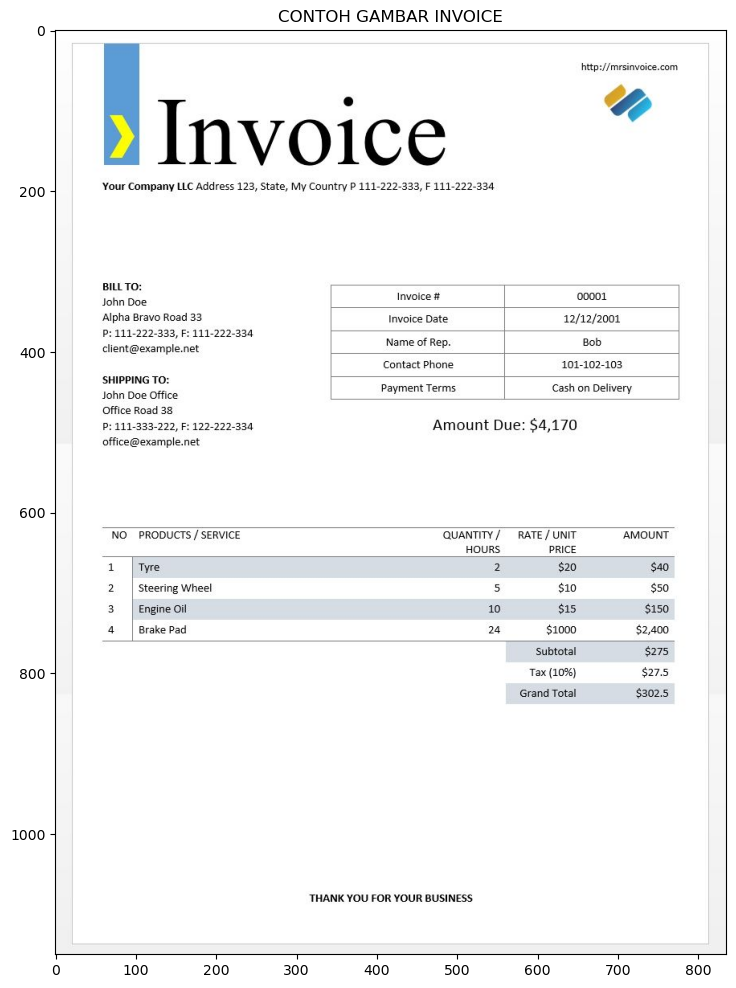

In [6]:
# Bounding Box - Level Karakter

# Plot gambar original
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

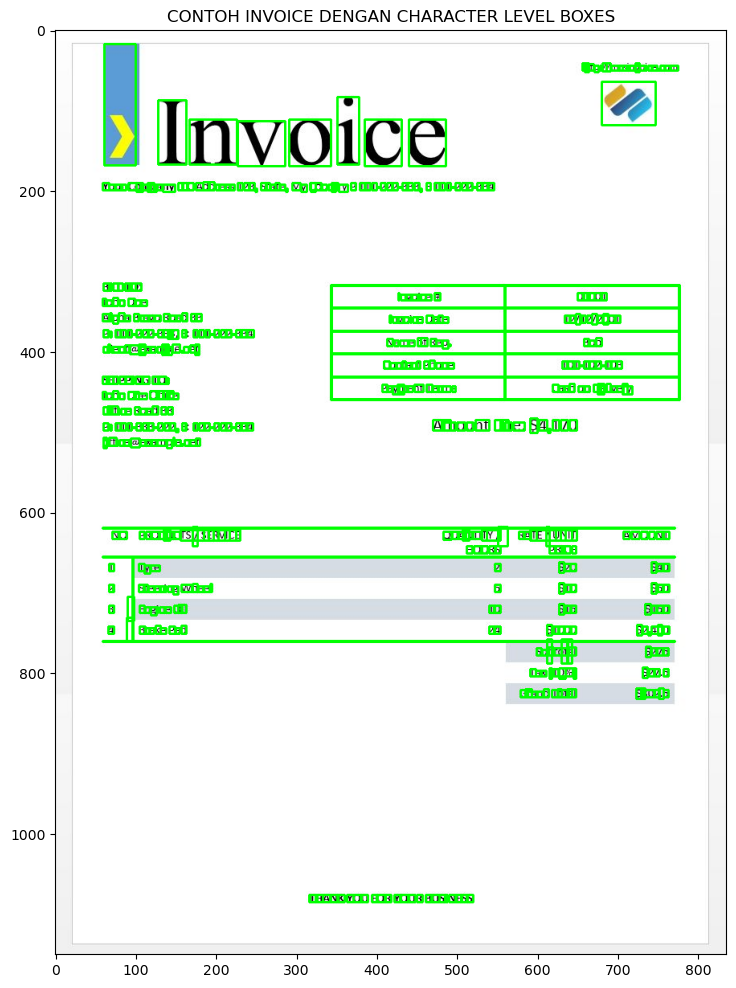

In [7]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()

In [8]:
# Bounding Box - Level Kata

# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


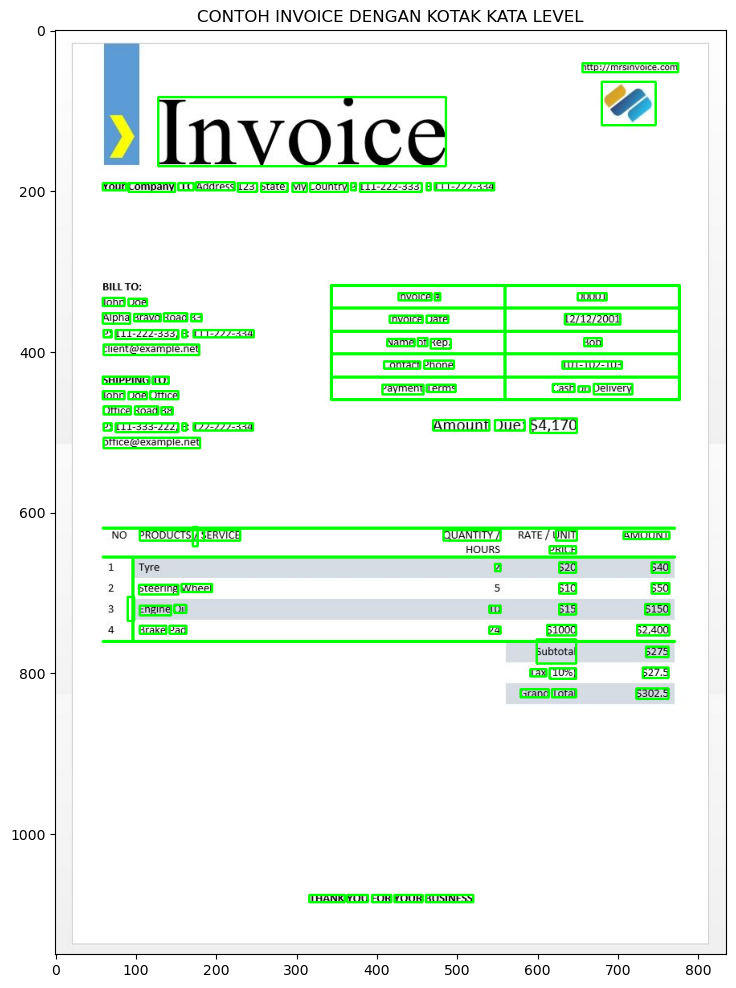

In [9]:
# Mendapatkan jumlah kotak (jumlah kata yang terdeteksi)
n_boxes = len(d['text'])

for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()

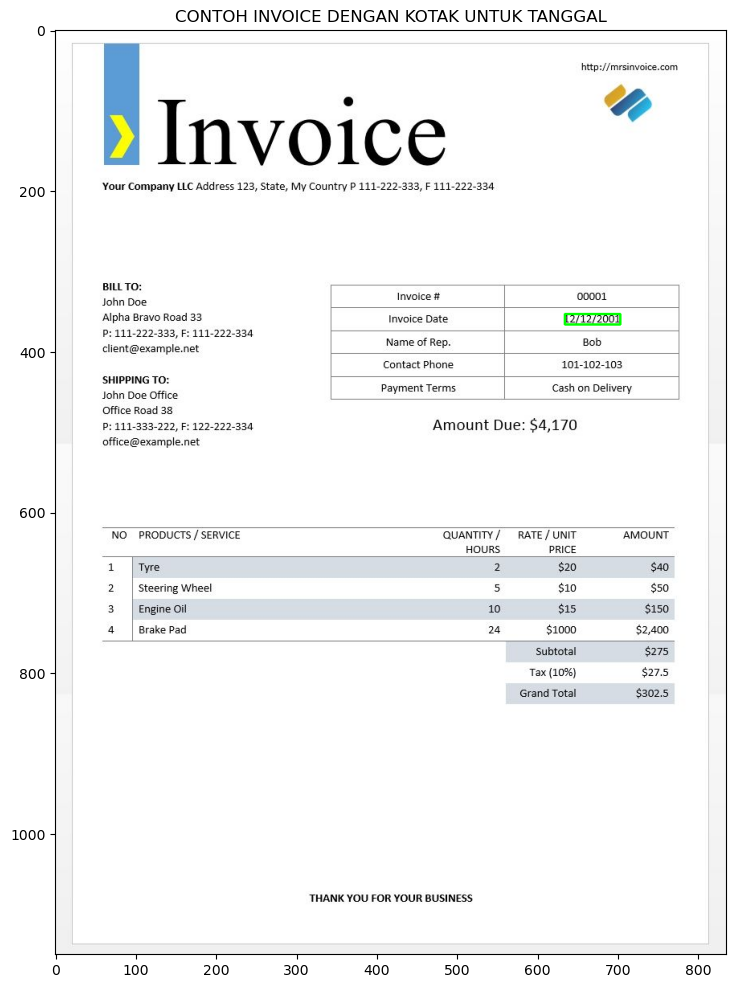

In [10]:
# Text template matching - Pola Regex

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

# Mendapatkan jumlah kotak (jumlah kata yang terdeteksi)
n_boxes = len(d['text'])

# Loop untuk memeriksa setiap kotak
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

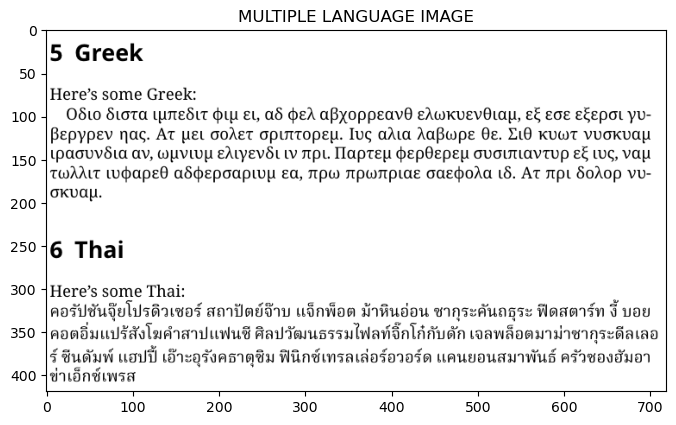

In [11]:
# Deteksi berbagai bahasa - OCR

# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [12]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMEesit Huy Et, aS ea aByoppeave edAwkvevOuay, e ece efepot yu-
Bepypev nas. AT Wel GoAET opiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil WV mpL TMaptep depSepep GvaUTLAVTUp e€€ LUG, Va
TWAALT LUdaped ASoepoapluy Ea, TOW MpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aossugulusdawos amiadiw usntion sinfiudou winszduagss Haaonsn 3 vos
Aonduudsaladrawunus AavTausssulwavanlAdudn wandoamnsirwinsedataa
$ Suduvi woud ovasaas osu Windinsadoso10so unusouanrwus aswouduer
didadinsa
